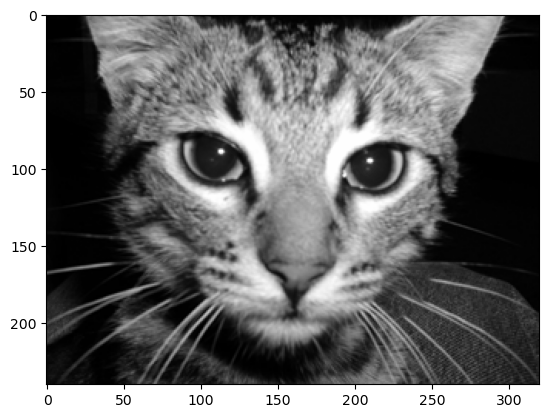

In [3]:
from math import floor
import matplotlib.pyplot as plt

import numpy as np
from numpy import array, int32
import random
from pylab import *


def read_pgm(path):
    with open(path, 'rb') as pgmf:
        im = plt.imread(pgmf)
    return im
chatImg = read_pgm('./chat.pgm')
plt.imshow(chatImg, cmap='gray')
plt.show()

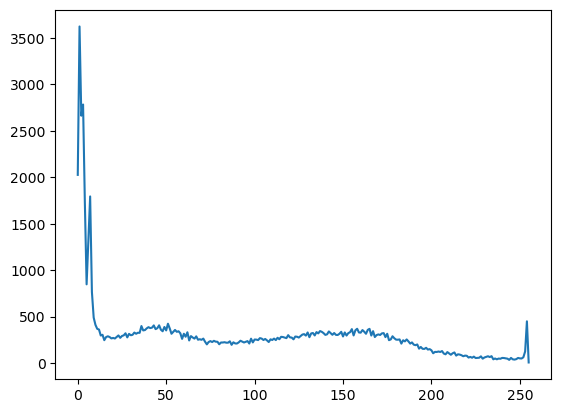

In [4]:
def histo(img):
    arr = np.zeros(256)
    for row in img:
        for num in row:
            arr[num] += 1
    return arr
his = histo(chatImg)

plot(his)
show()

In [5]:
def cumule(img):
    arr = histo(img)

    arr_cumul = np.zeros(256)
    arr_cumul[0] = arr[0]
    for i in range(1, len(arr_cumul)):

        arr_cumul[i] = arr[i] + arr_cumul[i-1]

    return arr_cumul


In [6]:
def P_cumule(img, width, height):
    arr_cumul = cumule(img)
    p_cum = []

    for n in arr_cumul:
        p_cum.append(n/(width*height))

    return p_cum



In [7]:
def n1(img, width, height):
    pc = P_cumule(img, width, height)
    n1_arr = []
    for pi in pc:
        n1_arr.append(floor(pi*255))

    return n1_arr


In [8]:
def Heg(img, width, height):
    h_arr = histo(img)
    n1_arr = n1(img, width, height)
    heg_arr = np.zeros(len(h_arr))

    for i in range(len(h_arr)):
        j = n1_arr[i]
        heg_arr[j] += h_arr[i]

    return heg_arr


In [19]:
def convert_img(img):
    n1_arr = n1(img, width=img.shape[0], height=img.shape[1])

    new_im = np.zeros((img.shape[0], img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_im[i][j] = n1_arr[img[i][j]]

    return new_im

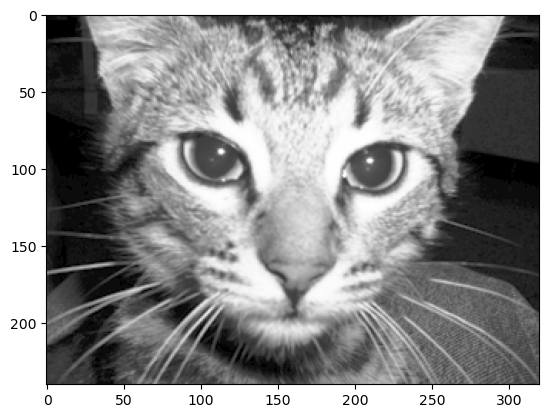

In [25]:
new_im = convert_img(img=chatImg)
plt.imshow(new_im, cmap='gray')
plt.show()

In [30]:
def pgmwrite(img, filename, maxVal=255, magicNum='P2'):
    img = int32(img).tolist()
    f = open(filename + ".pgm", 'w')
    file = open(filename+".txt", "w+")
    content = str(img)
    file.write(content)
    file.close()
    width = 0
    height = 0
    for row in img:
        height = height + 1
        width = len(row)
    f.write(magicNum + '\n')
    f.write(str(width) + ' ' + str(height) + '\n')
    f.write(str(maxVal) + '\n')
    for i in range(height):
        count = 1
        for j in range(width):
            f.write(str(img[i][j]) + ' ')
            if count >= 17:
                # No line should contain gt 70 chars (17*4=68)
                # Max three chars for pixel plus one space
                count = 1
                f.write('\n')
            else:
                count = count + 1
        f.write('\n')
    f.close()



In [31]:
pgmwrite(filename="chat_equalized", img=new_im)